Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import random

Inicializaciones

In [2]:
#Dimensiones de la imagen a crear
ancho = 200
alto = 200

Imagen en grises

In [3]:
#Crea una imagen de un único plano, que se interpreta como nivel de gris (0 negro, 255 blanco)
gris_img = np.zeros((ancho,alto,1), dtype = np.uint8)
#Muestra dimensiones de la imagen creada
print(gris_img.shape)

(200, 200, 1)


Plano con textura de ajedrez

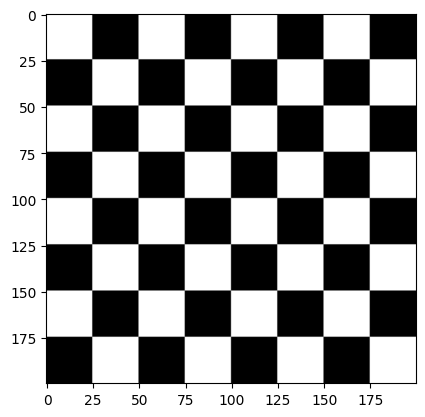

True

In [19]:
#pintamos de negro toda la matriz
gris_img[0:200,0:200] = 0
#inicializamos nuestros variables de ancho y largo
num_iter=0
x=0
y=0
while x <=200:
    y = 0 if num_iter % 2 == 0 else 25
    while y<=200:        
        gris_img[x:x+25,y:y+25,0] = 255
        y=y+50
    num_iter+=1
    x=x+25

#Muestra la imagen con matplotlib
#Es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray')
plt.show()
cv2.imwrite("ajedrez.jpg", gris_img)

Crear una imagen estilo Mondrian como por ejemplo

(1000, 1000, 3)


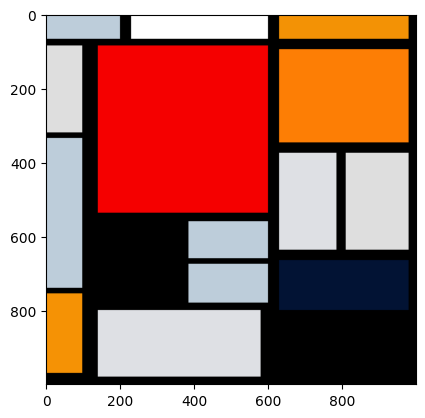

In [5]:
#Crea una imagen con tres planos
color_img = np.zeros((1000,1000,3), dtype = np.uint8)
#Dimensiones
print(color_img.shape)

#1
color_img[0:67,0:200,0] = 189
color_img[0:67,0:200,1] = 205
color_img[0:67,0:200,2] = 218
#---
color_img[0:67,230:600,0] = 255
color_img[0:67,230:600,1] = 255
color_img[0:67,230:600,2] = 255
#---
color_img[0:67,630:980,0] = 243
color_img[0:67,630:980,1] = 146
color_img[0:67,630:980,2] = 5

#2
color_img[95:347,630:980,0] = 253
color_img[95:347,630:980,1] = 126
color_img[95:347,630:980,2] = 5
#---
color_img[85:537,140:600,0] = 245  #460/2= 230
#---

color_img[560:660,385:600,2] = 218
color_img[560:660,385:600,1] = 205
color_img[560:660,385:600,0] = 189
#---
color_img[675:780,385:600,2] = 218
color_img[675:780,385:600,1] = 205
color_img[675:780,385:600,0] = 189

color_img[560:780,140:365,1] = 0

#3
color_img[375:637,630:785,0] = 222
color_img[375:637,630:785,1] = 224
color_img[375:637,630:785,2] = 228
#---
color_img[375:637,810:980,0] = 222
color_img[375:637,810:980,1] = 222
color_img[375:637,810:980,2] = 222

#4
color_img[665:800,630:980,0] = 2 #altura 165
color_img[665:800,630:980,1] = 19
color_img[665:800,630:980,2] = 52
#---

color_img[800:980,140:580,0] = 222
color_img[800:980,140:580,1] = 224
color_img[800:980,140:580,2] = 228
#---
color_img[820:980,600:980,0] = 0

#columnas
color_img[85:320,0:98,0] = 222 #altura 165
color_img[85:320,0:98,1] = 222
color_img[85:320,0:98,2] = 222
#---
color_img[335:740,0:98,0] = 189 #altura 165
color_img[335:740,0:98,1] = 205 
color_img[335:740,0:98,2] = 218 
#---

color_img[755:970,0:98,0] = 245 #altura 165
color_img[755:970,0:98,1] = 146
color_img[755:970,0:98,2] = 5


plt.imshow(color_img) 
plt.show()

Cuadro Piet Mondrian: https://media.vogue.mx/photos/61805037530d745b9ecd49f2/master/w_1600,c_limit/Piet-Mondrian-composicio%CC%81n-en-rojo-amarillo-y-azul.jpg

(575, 567, 3)


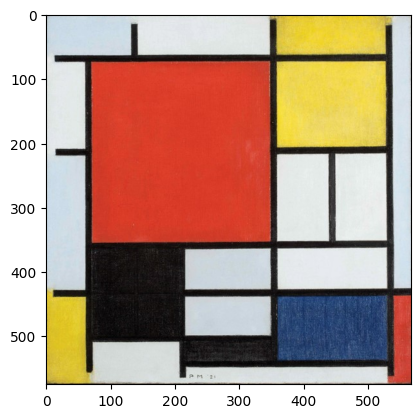

In [6]:
#Carga imagen desde disco
img = cv2.imread('piet-mondrian-work.jpg') 
#Dimensiones
print(img.shape)

#OpenCV lee las imágenes de disco en formato BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

Utilización de las funciones OpenCV

In [23]:
import cv2
import numpy as np

# Create a blank white image
width, height = 200, 200
margin = 45  # Set the margin size
image = np.ones((height, width, 3), np.uint8)

# Calcula las coordenadas del triangulos y susvertices
triangle_height = int(np.sqrt(3) / 2 * (height - 2 * margin))
triangle_top = (width // 2, margin)
triangle_left = (margin, height - margin)
triangle_right = (width - margin, height - margin)
print(triangle_right)


# Calcula los radios
big_circle_radius = 35
tiny_circle_radius = 15

# Dibuja los circulos
cv2.circle(image, triangle_top, big_circle_radius, (0, 0, 255), -1)  # Red circle
cv2.circle(image, triangle_left, big_circle_radius, (0, 255, 0), -1)  # Green circle

cv2.circle(image, triangle_top, tiny_circle_radius, (0, 0, 0), -1)  # Red circle
cv2.circle(image, triangle_left, tiny_circle_radius, (0, 0, 0), -1)  # Green circle

# Definimos los puntos cardinales de los vertices
triangle_pts = np.array([triangle_top, triangle_left, triangle_right], np.int32)

# Se dibuja el triangulo equilatero
#cv2.polylines(image, [triangle_pts], isClosed=True, color=(255, 255, 255), thickness=2)
cv2.fillPoly(image, [triangle_pts], color=(0, 0, 0))

#Dibujamos el triangulo equilatero inverso y el circulo azul
cv2.circle(image, triangle_right, big_circle_radius, (255, 0, 0), -1)  # Blue circle
cv2.circle(image, triangle_right, tiny_circle_radius, (0, 0, 0), -1)  # Blue circle

#Calculamos el primer triangulo
center_x, center_y = triangle_right[0], 120
triangle_bottom_inverse = (center_x, center_y + big_circle_radius)
triangle_left_inverse = (center_x - big_circle_radius, center_y - big_circle_radius )
triangle_right_inverse = (center_x + big_circle_radius, center_y - big_circle_radius )

# Define los vertices del triangulo inverso
triangle_pts = np.array([triangle_bottom_inverse, triangle_left_inverse, triangle_right_inverse], np.int32)

# Dibuja el triangulo inverso
cv2.fillPoly(image, [triangle_pts], (0, 0, 0))

font = cv2.FONT_HERSHEY_DUPLEX  
cv2.putText(image,'OpenCV',(40,alto//2+10), font, 1,(255,255,255),2,cv2.LINE_AA)

# Display the image with circles
cv2.imshow("OpenCV logo", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


(155, 155)


Detección del Píxel más Claro y el Píxel más Oscuro

In [24]:
import cv2
import numpy as np

# Cargamos la imagen
image = cv2.imread('patron_fondo.jpg')

# Convertimos la imagen a escala de grises para simplificar el proceso
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Encontramos las coordenadas (fila, columna) del píxel más claro
min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(gray_image)


brightness = max_value
darkness = min_value
# Dibujamos un círculo en el píxel más claro (para visualización)
image_with_circle = image.copy()
cv2.circle(image_with_circle, max_loc, 3, (0, 0, 255), -1)  # Dibuja un círculo en rojo
cv2.circle(image_with_circle, min_loc, 3, (0, 0, 255), -1)  # Dibuja un círculo en rojo

# Mostramos la imagen con el píxel más claro resaltado
cv2.imshow('Imagen pixel mas claro y oscuro', image_with_circle)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Imprimimos las coordenadas y el valor de intensidad del píxel más claro
print(f"Coordenadas del Píxel Más Claro: {max_loc}")
print(f"Coordenadas del Píxel Más Oscuro: {min_loc}")
print(f"Valor de Intensidad del Píxel Más Claro: {brightness}")
print(f"Valor de Intensidad del Píxel Más Oscuro: {darkness}")


Coordenadas del Píxel Más Claro: (322, 138)
Coordenadas del Píxel Más Oscuro: (540, 32)
Valor de Intensidad del Píxel Más Claro: 145.0
Valor de Intensidad del Píxel Más Oscuro: 12.0


Detección de la Matriz 8X8 de Píxeles más Claros y más Oscuros

In [25]:
import cv2
import numpy as np

# Cargamos la imagen
image = cv2.imread('patron_fondo.jpg')

# Convertimos la imagen a escala de grises para simplificar el proceso
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inicializamos las variables para almacenar la ubicación y el valor de intensidad de la región más clara y más oscura
max_brightness = 0
max_loc = (0, 0)

min_brightness = 255
min_loc = (0,0)

# Iteramos a través de ventanas deslizantes de 8x8 píxeles
for y in range(0, gray_image.shape[0] - 7):
    for x in range(0, gray_image.shape[1] - 7):
        # Extraemos la región de 8x8 píxeles
        region = gray_image[y:y+8, x:x+8]
        
        # Calculamos el valor de intensidad promedio de la región
        brightness = np.mean(region)
        
        # Si encontramos una región más clara que la actual, actualizamos los valores
        if brightness > max_brightness:
            max_brightness = brightness
            max_loc = (x, y)

        # Si encontramos una región más oscura que la actual, actualizamos los valores
        if brightness < min_brightness:
            min_brightness = brightness
            min_loc = (x, y)

# Dibujamos un rectángulo en la región más clara (para visualización)
image_with_rectangle = image.copy()
cv2.rectangle(image_with_rectangle, max_loc, (max_loc[0] + 8, max_loc[1] + 8), (0, 0, 255), 2)  # Dibuja un rectángulo rojo
cv2.rectangle(image_with_rectangle, min_loc, (min_loc[0] + 8, min_loc[1] + 8), (0, 0, 255), 2)  # Dibuja un rectángulo rojo

# Mostramos la imagen con la región más clara resaltada
cv2.imshow('Imagen', image_with_rectangle)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Imprimimos las coordenadas y el valor de intensidad de la región más clara
print(f"Coordenadas de la Región Más Clara: {max_loc}")
print(f"Valor de Intensidad de la Región Más Clara: {max_brightness}")
print(f"Coordenadas de la Región Más Oscura: {min_loc}")
print(f"Valor de Intensidad de la Región Más Oscura: {min_brightness}")


Coordenadas de la Región Más Clara: (298, 151)
Valor de Intensidad de la Región Más Clara: 125.8125
Coordenadas de la Región Más Oscura: (578, 32)
Valor de Intensidad de la Región Más Oscura: 19.28125


fondo link: https://img.freepik.com/fotos-premium/patron-marmol-natural-fondo_1258-22160.jpg

Cambiar el plano de una imagen

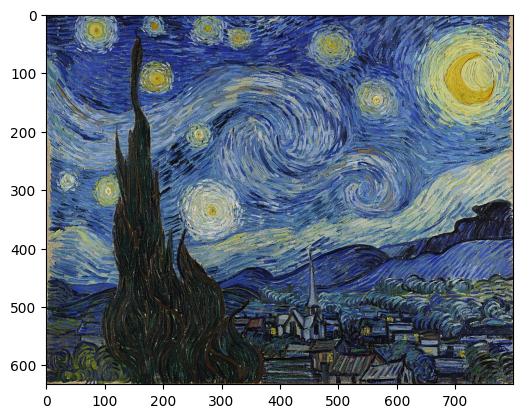

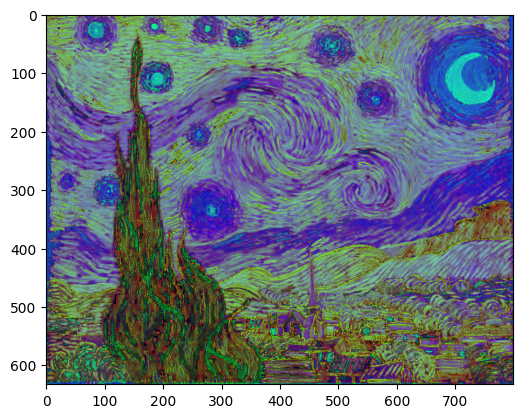

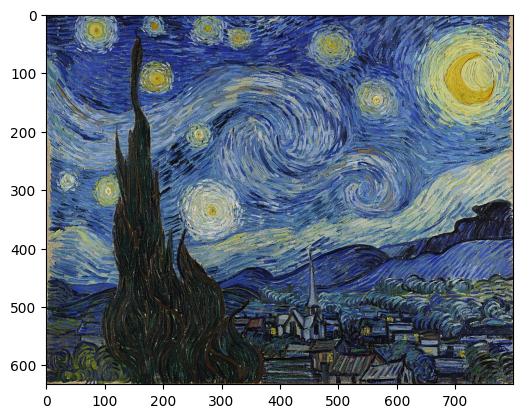

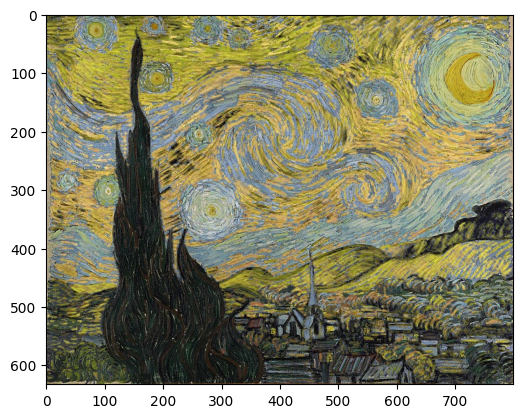

In [27]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('noche-estrellada.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()
plt.imshow(img_hsv)
plt.show()
lower = np.array([90, 100, 20])
upper = np.array([120, 255, 255])

mask = cv2.inRange(hsv, lower, upper)

inv_mask = cv2.bitwise_not(mask)

h, s, v = cv2.split(hsv)
h = np.mod(h + 170, 180)
s = np.clip(s, 0, 255)
v = np.clip(v + 40, 0, 255)
hsv = cv2.merge([h, s, v])

bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

result = cv2.bitwise_or(cv2.bitwise_and(img, img, mask=inv_mask), cv2.bitwise_and(bgr, bgr, mask=mask))
cv2.imwrite('noche-modificada.jpg',result)

img_3= cv2.bitwise_and(img, img, mask=inv_mask)

##############33333




img = cv2.imread('noche-estrellada.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

img_mod = cv2.imread('noche-modificada.jpg') 
img_mod = cv2.cvtColor(img_mod, cv2.COLOR_BGR2RGB)
plt.imshow(img_mod) 
plt.show()

TAREA: Haz tu propuesta pop art

In [28]:
import cv2
import numpy as np
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

lower = np.array([10, 20, 89]) #azul oscuro
upper = np.array([120, 255, 255]) #azul claro

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame1 = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)    

    frame2 = cv2.inRange(frame1, lower, upper)

    frame = cv2.bitwise_not(frame2)
    #plt.imshow(mask) 
    if ret:
        #Separamos canales
        bgr_channels = cv2.merge([frame2, frame2 + 55, frame2])
        collage[0:h,0:w] = bgr_channels

        bgr_channels = cv2.merge([frame2, frame2 + 55, frame2 - 76])
        collage[0:h,w:w+w] = bgr_channels

        bgr_channels = cv2.merge([frame2, frame2 + 155, frame2 - 45])
        bl = collage[h:h+h,0:w]= bgr_channels

        bgr_channels = cv2.merge([frame2, frame2 + 175, frame2 + 75])
        br = collage[h:h+h,w:w+w] = bgr_channels

       
        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()